# 통계학에서의 표본분포

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv('./datasets/loans_income.csv').squeeze()

In [32]:
sample_data = pd.DataFrame({
    'income': df.sample(1000),
    'type':'Data'})

In [33]:
sample_mean_05 = pd.DataFrame({
    'income': [df.sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5'})

In [34]:
sample_mean_20 = pd.DataFrame({
    'income': [df.sample(20).mean() for _ in range(1000)],
    'type':'Mean of 20'})

In [39]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.sample(10)

,income,type
849,70920.0,Mean of 5
33897,35000.0,Data
34221,102000.0,Data
442,62116.0,Mean of 5
811,56423.3,Mean of 20
777,76259.6,Mean of 20
38820,60000.0,Data
178,70400.0,Mean of 5
853,62600.0,Mean of 5
121,77157.3,Mean of 20


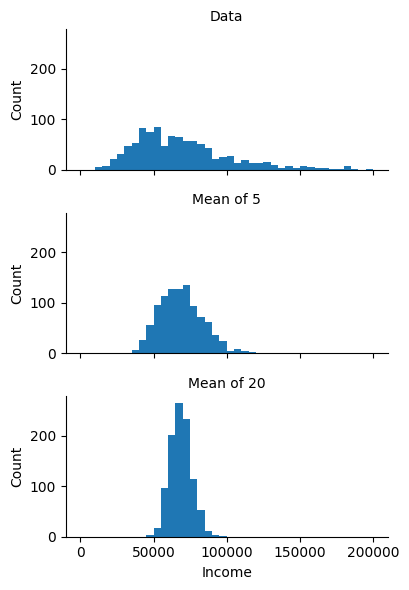

In [38]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}');

# 부트스트랩

In [40]:
from sklearn.utils import resample

results = []
for _ in range(1000):
    sample = resample(df)
    results.append(sample.median())
    
results = pd.Series(results)

In [41]:
print('Bootstrap Statistics:')
print(f'original: {df.median()}')
print(f'bias: {results.mean() - df.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -63.8640000000014
std. error: 197.19946534697584


# 정규분포

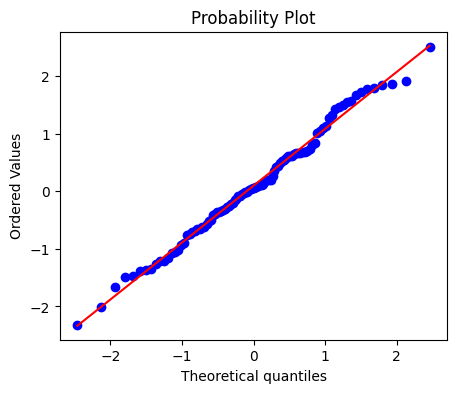

In [45]:
from scipy import stats

fig, ax = plt.subplots(figsize=(5,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax);

# 긴 꼬리 분포

In [67]:
import numpy as np 
df = pd.read_csv('./datasets/sp500_data.csv.gz')
df = df['NFLX']
df = np.diff(np.log(df[df>0]))
# df = np.diff(df[df>0])

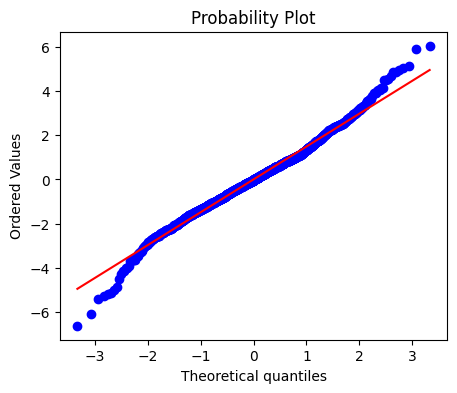

In [68]:
fig, ax = plt.subplots(figsize=(5,4))
stats.probplot(df, plot=ax);

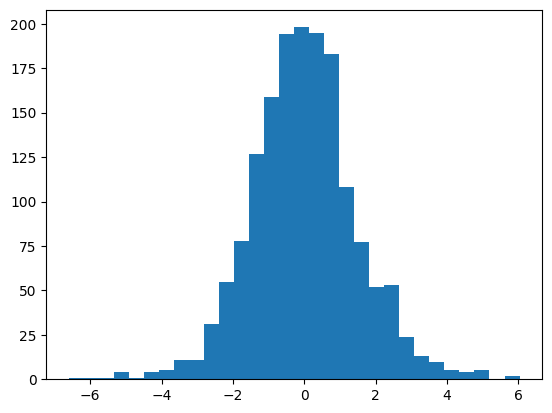

In [69]:
plt.hist(df, bins=30);

# 이항분포

In [71]:
from scipy import stats

In [76]:
stats.binom.pmf(0, n=5, p=0.1)

0.5904900000000001

In [77]:
stats.binom.pmf(1, n=5, p=0.1)

0.32804999999999995

In [78]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [79]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144